In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. 데이터 가져오기

In [2]:
t_bat16=pd.read_csv("C:/Users/a/Desktop/2020빅콘/제공데이터/제공데이터(.CSV)_시즌별, 시트별 구분/2020빅콘테스트_스포츠투아이_제공데이터_팀타자_2016.csv",encoding='utf-8',engine='python')
t_bat17=pd.read_csv("C:/Users/a/Desktop/2020빅콘/제공데이터/제공데이터(.CSV)_시즌별, 시트별 구분/2020빅콘테스트_스포츠투아이_제공데이터_팀타자_2017.csv",encoding='utf-8',engine='python')
t_bat18=pd.read_csv("C:/Users/a/Desktop/2020빅콘/제공데이터/제공데이터(.CSV)_시즌별, 시트별 구분/2020빅콘테스트_스포츠투아이_제공데이터_팀타자_2018.csv",encoding='utf-8',engine='python')
t_bat19=pd.read_csv("C:/Users/a/Desktop/2020빅콘/제공데이터/제공데이터(.CSV)_시즌별, 시트별 구분/2020빅콘테스트_스포츠투아이_제공데이터_팀타자_2019.csv",encoding='utf-8',engine='python')

In [3]:
#모든 열 다 출력하기
pd.options.display.max_columns=None

## 2. train test 셋 만들기

In [4]:
team=['HH', 'HT', 'KT', 'LG', 'LT', 'NC', 'OB', 'SK', 'SS', 'WO']

In [5]:
def make_data(train_data,answer_data):
    train_data['HIT_RATE']=train_data['HIT']/train_data['AB']
    tr=train_data[['T_ID','HIT_RATE']]  #경기당 팀과 타율만 남김
    num=list(range(1,int((len(train_data)/10)+1)))*10  #팀별 경기순서 추가
    tr=tr.assign(order=num)
    tr=tr.pivot(index='T_ID',columns='order',values='HIT_RATE') #팀당 경기별 타율 데이터셋 만들기
    
    data=pd.merge(tr,answer_data,on='T_ID') #팀별 앞124경기와 후20경기 결과 합치기
    return data

In [6]:
#정답 셋과 train 셋 만드는 함수
t_bat=[t_bat16,t_bat17,t_bat18,t_bat19]
def make_answer_train(year):
    a=t_bat[year-2016][['T_ID','AB','HIT','PA']]  
    data=pd.DataFrame()  #빈 데이터프레임 만들기
    pa=pd.DataFrame()

    train_name=['train' + str(i) for i in range(1,5)]
    train_data=[pd.DataFrame() for var in train_name] #50경기씩 묶일 데이터셋
    
    ans_name=['ans' + str(i) for i in range(1,5)]
    answer=[pd.DataFrame() for var in ans_name]  #20경기씩 묶일 데이터셋
        
    for i in range(4):
        tra=train_data[i]
        ans=answer[i]
        for t in team:
            tra=pd.concat([tra,a[a['T_ID']==t][14+i*20:14+50+i*20]])
            ans=pd.concat([ans,a[a['T_ID']==t][14+50+i*20:14+70+i*20]])

        #팀별 AB,HIT합 구하기
        ans=ans.groupby(['T_ID']).sum()
        ans['HIT_RATE']=ans['HIT']/ans['AB'] #타율 계산
        ans=ans.drop(ans.columns[[0,1,2]],axis='columns')
        
        tr=tra.groupby(['T_ID']).sum()
        
        if i <3:
            data=pd.concat([data,make_data(tra,ans)])
            pa=pd.concat([pa,tr])
        else:
            test_data=make_data(tra,ans)
            test_data['PA']=tr['PA']
            
    #mean 추가
    data['mean']=data.iloc[:,:50].mean(axis=1)
    test_data['mean']=test_data.iloc[:,:50].mean(axis=1)
    
    data['PA']=pa['PA']
        
    return data,test_data

In [7]:
train16,test16=make_answer_train(2016)
train17,test17=make_answer_train(2017)
train18,test18=make_answer_train(2018)
train19,test19=make_answer_train(2019)

In [8]:
train16

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,HIT_RATE,mean,PA
T_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
HH,0.277778,0.393939,0.212121,0.181818,0.129032,0.222222,0.236842,0.394737,0.225806,0.285714,0.178571,0.218750,0.333333,0.270270,0.324324,0.133333,0.361111,0.181818,0.187500,0.166667,0.428571,0.250000,0.187500,0.270270,0.352941,0.319149,0.275000,0.156250,0.378378,0.342105,0.410256,0.333333,0.312500,0.400000,0.285714,0.303030,0.200000,0.324324,0.250000,0.275862,0.333333,0.161290,0.250000,0.242424,0.323529,0.205882,0.324324,0.366667,0.297297,0.257143,0.307692,0.274655,1995
HT,0.205882,0.277778,0.437500,0.357143,0.225806,0.175000,0.233333,0.297297,0.218750,0.241379,0.233333,0.473684,0.371429,0.193548,0.297297,0.368421,0.421053,0.222222,0.333333,0.281250,0.305556,0.272727,0.314286,0.321429,0.242424,0.312500,0.250000,0.272727,0.375000,0.270270,0.315789,0.297297,0.204545,0.272727,0.206897,0.156250,0.312500,0.225806,0.129032,0.363636,0.258065,0.129032,0.342857,0.324324,0.305556,0.297297,0.352941,0.121212,0.333333,0.371429,0.303644,0.282458,1984
KT,0.303030,0.228571,0.400000,0.390244,0.315789,0.200000,0.250000,0.103448,0.258065,0.250000,0.264706,0.290323,0.257143,0.218750,0.428571,0.476190,0.393939,0.264706,0.258065,0.277778,0.264706,0.166667,0.371429,0.161290,0.096774,0.242424,0.295455,0.468085,0.282051,0.375000,0.305556,0.314286,0.212121,0.272727,0.285714,0.142857,0.235294,0.236842,0.257143,0.297297,0.133333,0.343750,0.241379,0.340000,0.235294,0.068966,0.214286,0.290323,0.161290,0.222222,0.279661,0.267278,1960
LG,0.307692,0.161290,0.222222,0.294118,0.218750,0.305556,0.285714,0.178571,0.250000,0.129032,0.277778,0.172414,0.193548,0.250000,0.272727,0.488889,0.303030,0.275862,0.421053,0.264706,0.281250,0.210526,0.310345,0.333333,0.241379,0.233333,0.235294,0.277778,0.212121,0.465116,0.212766,0.285714,0.354839,0.292683,0.441860,0.307692,0.352941,0.382353,0.371429,0.200000,0.342105,0.342857,0.350000,0.187500,0.205882,0.363636,0.333333,0.325000,0.181818,0.181818,0.292750,0.281793,1995
LT,0.172414,0.447368,0.272727,0.393939,0.350000,0.222222,0.166667,0.277778,0.333333,0.233333,0.156250,0.156250,0.166667,0.323529,0.103448,0.324324,0.264706,0.477273,0.264706,0.300000,0.378378,0.243243,0.289474,0.305556,0.205882,0.264706,0.297297,0.350000,0.394737,0.275862,0.305556,0.333333,0.290323,0.218750,0.333333,0.285714,0.222222,0.250000,0.297297,0.307692,0.218750,0.241379,0.264706,0.323529,0.214286,0.277778,0.277778,0.378378,0.205882,0.242424,0.310576,0.278024,2002
NC,0.333333,0.368421,0.222222,0.193548,0.166667,0.343750,0.235294,0.272727,0.289474,0.277778,0.361111,0.372093,0.405405,0.250000,0.400000,0.257143,0.333333,0.257143,0.277778,0.162791,0.250000,0.388889,0.297297,0.235294,0.393939,0.378378,0.285714,0.270270,0.439024,0.410256,0.368421,0.235294,0.181818,0.250000,0.133333,0.386364,0.241379,0.266667,0.375000,0.351351,0.292683,0.400000,0.368421,0.218750,0.400000,0.390244,0.468085,0.133333,0.175000,0.218750,0.265861,0.299679,2099
OB,0.400000,0.264706,0.382353,0.241379,0.178571,0.241379,0.257143,0.300000,0.166667,0.312500,0.257143,0.437500,0.422222,0.161290,0.200000,0.391304,0.351351,0.342857,0.285714,0.384615,0.428571,0.297297,0.300000,0.439024,0.303030,0.395349,0.333333,0.257143,0.290323,0.406250,0.312500,0.290323,0.290323,0.257143,0.222222,0.225806,0.166667,0.300000,0.290323,0.272727,0.309524,0.242424,0.297297,0.200000,0.250000,0.295455,0.305556,0.333333,0.375000,0.205882,0.284672,0.297430,2023
SK,0.205882,0.361111,0.222222,0.230769,0.351351,0.290323,0.342105,0.187500,0.258065,0.303030,0.333333,0.166667,0.242424,0.322581,0.437500,0.312500,0.225806,0.348837,0.342105,0.281250,0.303030,0.100000,0.147059,0.281250,0.225806,0.250000,0.235294,0.324324,0.285714,0.038462,0.418605,0.312500,0.250000,0.289474,0.312500,0.384615,0.133333,0.137931,0.264706,0.225806,0.272727,0.200000,0.275862,0.314286,0.323529,0.352941,0.257143,0.384615,0.466667,0.43181

## 3. 모델학습

In [9]:
# 출력 할 때 마다, 기존 출력물들은 제거해주는 모듈
from IPython.display import clear_output

In [10]:
# 모델 모듈
import xgboost
from xgboost import XGBRegressor, plot_importance
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [11]:
X_cols=list(range(1,51))+['mean']
Y_col=['HIT_RATE']

In [12]:
#### 학습시킬 모델
model_dict = {'xgb':XGBRegressor(n_estimators=100, learning_rate=0.05 ,max_depth=3, random_state=23),
    'lgbm':LGBMRegressor(),
    'rf':RandomForestRegressor(),
    'svr':SVR(),
    'reg':LinearRegression(),
    'ridge':Ridge(alpha=100,normalize=True),
    'lasso':Lasso(alpha=0.05,normalize=True)}  #변수 자동 채택 / 많은 변수를 다룰때 활용

In [13]:
train=train16
test=test16

In [14]:
X_train = train[X_cols]; Y_train = train[Y_col]
X_test = test[X_cols]; Y_test = test[Y_col]
diff=[]

#모델 여러개 돌려보기
model_list=['xgb','lgbm','rf','svr','reg','ridge','lasso']
weight = train['mean']

for m in model_list:
    model = model_dict[m]
    if m=='rf': Y_train=Y_train.values.ravel()  #rf에서의 오류 없애기 위함
    model.fit(X_train, Y_train)  #, sample_weight=weight
    Y_predict = model.predict(X_test)

    r2=r2_score(Y_test, Y_predict)

    a=Y_test.assign(predict=Y_predict)
    a['diff']=a['HIT_RATE']-a['predict']
    print(m,"\t>r2 :", r2,'\ttrain점수 :{:.3f}'.format(model.score(X_train,Y_train)),"\t차이합 :",abs(a['diff']).sum())
    diff.append(abs(a['diff']).sum())

xgb 	>r2 : -1.0024887577656019 	train점수 :0.971 	차이합 : 0.15867924437378828
lgbm 	>r2 : -0.023199830653901188 	train점수 :-0.000 	차이합 : 0.0975509074854693
rf 	>r2 : -0.4280981111592428 	train점수 :0.844 	차이합 : 0.10684168915903985
svr 	>r2 : -0.06100762642626245 	train점수 :-0.076 	차이합 : 0.09178059787530285
reg 	>r2 : -1.8298679373905609 	train점수 :1.000 	차이합 : 0.19448169551686234
ridge 	>r2 : -0.029931012361691378 	train점수 :0.042 	차이합 : 0.09746688554725541
lasso 	>r2 : -0.023199806848862137 	train점수 :0.000 	차이합 : 0.09755090347552114


In [101]:
#r2가 가장 큰 모델 돌리기
model = model_dict[model_list[diff.index(min(diff))]]
if m=='rf': Y_train=Y_train.values.ravel()  #rf에서의 오류 없애기 위함
weight = train['mean']
model.fit(X_train, Y_train, sample_weight=weight)
Y_predict = model.predict(X_test)
print(model_list[diff.index(min(diff))])

svr


### 예측값과 실제값 차이

Text(0,0.5,'예측 값')

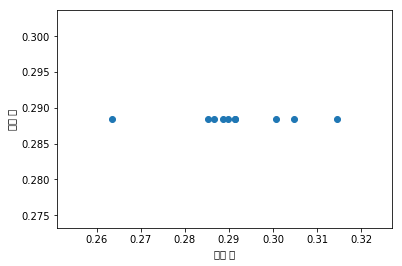

In [102]:
# 예측값과 실제값의 시각화
plt.scatter(Y_test, Y_predict)
plt.xlabel("실제 값")
plt.ylabel("예측 값")

In [103]:
#예측값과 실제값 차이
a=Y_test
a=a.assign(predict=Y_predict)
a['diff']=a['HIT_RATE']-a['predict']
a

,HIT_RATE,predict,diff
T_ID,,,
HH,0.291317,0.28843,0.002886
HT,0.263400,0.28843,-0.025030
KT,0.288630,0.28843,0.000200
LG,0.289706,0.28843,0.001276
LT,0.314448,0.28843,0.026017
NC,0.291429,0.28843,0.002998
OB,0.304654,0.28843,0.016224
SK,0.300562,0.28843,0.012132
SS,0.285311,0.28843,-0.003119


In [104]:
#차이 합
abs(a['diff']).sum()

0.09178059787530285